## Map plotting examples

In [4]:
from PyMapManager.mmMap import mmMap

# load a map
filePath = '/Users/cudmore/Desktop/data/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

map rr30a loaded in 0.34 seconds.


mmMap.getMapValues() took 0.2 seconds
mmMap.getMapValues() took 0.18 seconds


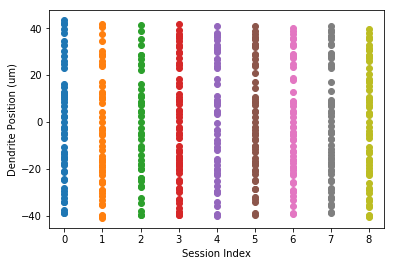

In [5]:
# getMapValues2(self, stat, roiType='spineROI', segmentID=[], plotBad=False)

segmentID = [0] # change this to '[]' to plot all segment, change to '[1,3,5]' to plot segment 1, 3, and 5

# m.getMapValues2() returns a 2D numpy ndarray
# rows are object runs, columns are sessions, each [i][j] is value for 'stat'
x = m.getMapValues2('mapSession', roiType='spineROI', segmentID=segmentID, plotBad=False)
y = m.getMapValues2('pDist', roiType='spineROI', segmentID=segmentID, plotBad=False)


import matplotlib.pyplot as plt

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('Session Index')
plt.ylabel('Dendrite Position (um)')
plt.show()

mmMap.getMapValues() took 0.18 seconds
mmMap.getMapValues() took 0.18 seconds


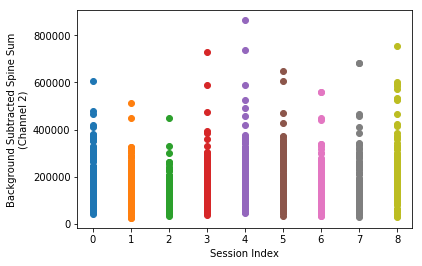

In [10]:
# slightly more interesting
# plot the 'background subtracted spine sum' from image channel one (bssSum_int1)

segmentID = []
x = m.getMapValues2('mapSession', roiType='spineROI', segmentID=segmentID, plotBad=False)
y = m.getMapValues2('ubssSum_int1', segmentID=segmentID)

# plot with matplotlib
plt.plot(x, y, 'o')
plt.xlabel('Session Index')
plt.ylabel('Background Subtracted Spine Sum\n(Channel 2)')
plt.show()

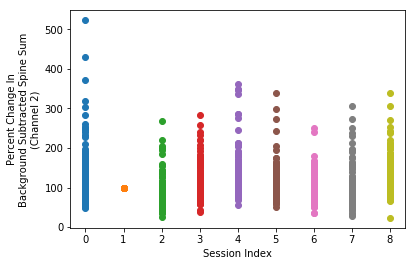

In [12]:
# replot ubssSum_int1 as percent change relative to session 1

sessionOne = y[:,1]
yPercent = y / sessionOne[:,None] * 100 # [:,None] to cast sessionOne to a numpy vector

# plot with matplotlib
plt.plot(x, yPercent, 'o')
plt.xlabel('Session Index')
plt.ylabel('Percent Change In\nBackground Subtracted Spine Sum\n(Channel 2)')
plt.show()